## CIFAR 이미지 분류 모델 구현
---
- 데이터 : CIFAR10 https://www.cs.toronto.edu/~kriz/cifar.html
- 학습방법 : 10가지 이미지 종류 분류 => 다중분류
- 이미지 : DNN(MLP), CNN 적용

In [222]:
# 모듈 로딩
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets.cifar10 import load_data
import numpy as np
import matplotlib.pyplot as plt

In [223]:
# W,b 고정하도록 seed 설정
set_random_seed(11)

## [1] 데이터 로딩

In [224]:
# 학습용, 테스트용 = 8 : 2
(x_train, y_train), (x_test, y_test) = load_data()

In [225]:
print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}, y_test.shape : {y_test.shape}')

x_train.shape : (50000, 32, 32, 3), y_train.shape : (50000, 1)
x_test.shape : (10000, 32, 32, 3), y_test.shape : (10000, 1)


## [2] 데이터 전처리 및 학습형태로 변환

In [226]:
# 스케일링 => 픽셀 / 255.0
x_train=x_train/255.0
x_test=x_test/255.0

In [227]:
# conv 레이어는 이미지의 채널 정보까지 입력
x_train=x_train.reshape(-1, 32, 32, 3)
x_test=x_test.reshape(-1, 32, 32, 3)

In [228]:
print(f'x_train.shape : {x_train.shape}, x_test.shape : {x_test.shape}')

x_train.shape : (50000, 32, 32, 3), x_test.shape : (10000, 32, 32, 3)


In [229]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

In [230]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  stratify=y_train,
                                                  random_state=11)

In [231]:
print(f'x_train.shape : {x_train.shape}, \nx_val.shape : {x_val.shape}, \nx_test.shape : {x_test.shape}')

x_train.shape : (37500, 32, 32, 3), 
x_val.shape : (12500, 32, 32, 3), 
x_test.shape : (10000, 32, 32, 3)


## [3] 모델 구성 및 생성
---
- 입력 형태 : 채널정보까지 포함 3차원 (32, 32, 3)
- 출력 형태 : 확률값 10개 출력
- 학습 방식 : 분류 - 다중분류
- 전반부
    * 이미지 특징 추출
        - Conv2D, MaxPool2D
- 후반부
    * 이미지 데이터 학습
        - Flatten, Dense

### [3-1] 모델 구상

In [232]:
model=Sequential()

In [233]:
# 이미지 특징 추출 Layer => 첫번째 입력값 설정
model.add(Conv2D(35, kernel_size=3, padding='same', input_shape=(32,32,3)))

In [234]:
# 이미지 특징 다운샘플링 Layer => MaxPool2D
model.add(MaxPool2D())

In [235]:
model.add(Conv2D(35, kernel_size=3, padding='same'))
model.add(MaxPool2D())

In [236]:
model.add(Dropout(0.2))

In [237]:
# 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())

In [238]:
# 출력층 => Node: 10개, activation : softmax
model.add(Dense(10, activation='softmax'))

In [239]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 35)        980       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 35)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 35)        11060     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 35)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 35)          0         
                                                                 
 flatten_9 (Flatten)         (None, 2240)             

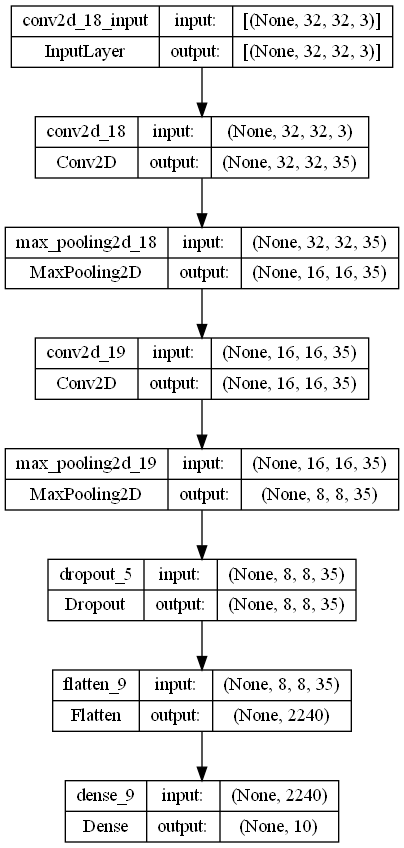

In [240]:
plot_model(model, show_shapes=True)

### [3-2] 모델 생성
---
- compile 메서드
    * loss 손실 함수 => sparse_categorical_crossentropy
    * optimizer 최적화 방식 => adam
    * metrics 평가항목 => accuracy

In [241]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

### [3-3] 모델 학습 
---
- fit 메서드
    * 학습 데이터, 라벨
    * epochs 학습횟수
    * batch_size 학습분량
    * validation_data (검증데이터, 검증라벨)
    * validation_split 학습데이터의 일부 비율 설정 (예:0.2)
    * callback
    * verbose 학습 진행도 화면 출력 여부 설정

In [242]:
his = model.fit(x_train, y_train, epochs=20,
                batch_size=10,
                validation_data=(x_val, y_val))

Epoch 1/20
3750/3750 [==============================] - 38s 10ms/step - loss: 1.4849 - accuracy: 0.4803 - val_loss: 1.2472 - val_accuracy: 0.5654
Epoch 2/20
3750/3750 [==============================] - 39s 10ms/step - loss: 1.2011 - accuracy: 0.5856 - val_loss: 1.1803 - val_accuracy: 0.5870
Epoch 3/20
3750/3750 [==============================] - 49s 13ms/step - loss: 1.1188 - accuracy: 0.6155 - val_loss: 1.1000 - val_accuracy: 0.6206
Epoch 4/20
3750/3750 [==============================] - 42s 11ms/step - loss: 1.0684 - accuracy: 0.6290 - val_loss: 1.1291 - val_accuracy: 0.6134
Epoch 5/20
3750/3750 [==============================] - 47s 13ms/step - loss: 1.0379 - accuracy: 0.6405 - val_loss: 1.1362 - val_accuracy: 0.6106
Epoch 6/20
3750/3750 [==============================] - 46s 12ms/step - loss: 1.0082 - accuracy: 0.6526 - val_loss: 1.1262 - val_accuracy: 0.6148
Epoch 7/20
3750/3750 [==============================] - 44s 12ms/step - loss: 0.9865 - accuracy: 0.6599 - val_loss: 1.0752 -

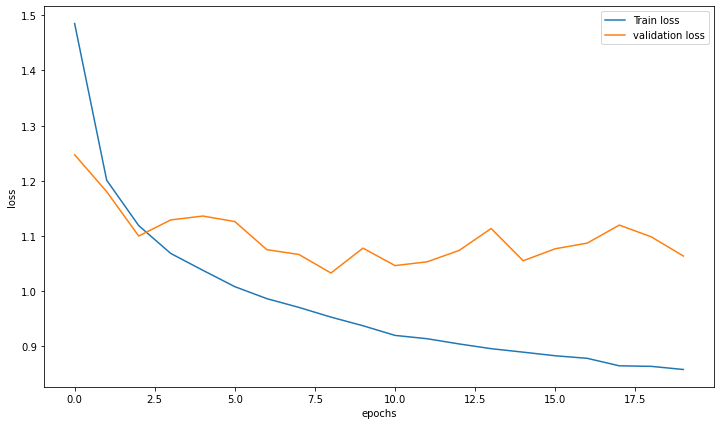

In [243]:
## 시각화
plt.figure(figsize=(12,7))
plt.plot(his.epoch, his.history['loss'], label='Train loss')
plt.plot(his.epoch, his.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

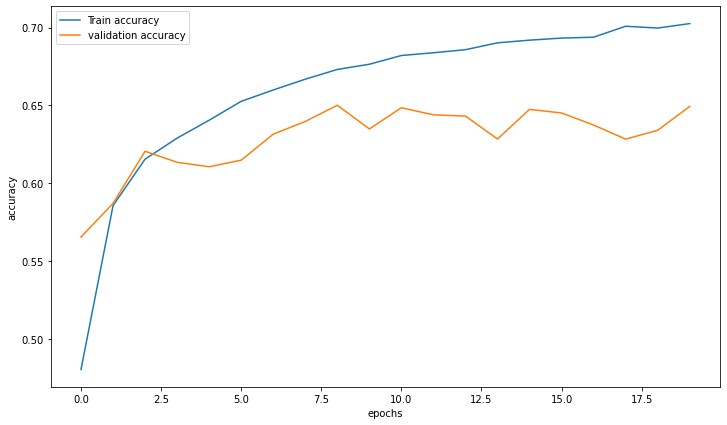

In [244]:
plt.figure(figsize=(12,7))
plt.plot(his.epoch, his.history['accuracy'], label='Train accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## [4] 평가
---
- evaluate 메서드
- 테스트 데이터, 테스트 라벨

In [245]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0749 - accuracy: 0.6403


[1.0748579502105713, 0.6402999758720398]

## [5] 테스트
---
- 새로운 데이터

In [258]:
import requests
import cv2

url='https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjA4MzBfMTM1%2FMDAxNjYxODQxNDMzNzkx.haCL0qIsZ2L-5HSdK4C10423FQpXilYIv2LmmPxBypwg.oMW0zvZdJQmXu5bvTL_gQUGSBXjZ5W9cn-CTNpNEVxYg.JPEG.lambogt2%2FP8290250.JPG&type=a340'





response = requests.get(url)

if response.status_code == 200:
    with open('test.jpg', 'wb') as fp:
        fp.write(response.content)

# 예측할 수 있도록 데이터 변형
img = []

im = cv2.imread('test.jpg')
# 입력 데이터 크기 : 32*32 픽셀
im = cv2.resize(im, (32,32))  # 사이즈 조정
im = im.reshape(-1,32,32,3)/255.0

In [259]:
pre_y=model.predict(im)
pre_y.round(2)

1/1 [==============================] - 0s 16ms/step


array([[0.4 , 0.2 , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.31, 0.02]],
      dtype=float32)

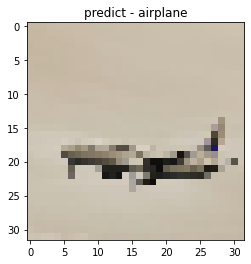

In [260]:
label = ['airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck']

plt.imshow(im.reshape(32,32,3))
plt.title(f'predict - {label[pre_y.argmax()]}')
plt.show()